# 1. Download data 

In [1]:
import ccxt
import time
import numpy as np
import pandas as pd
# Thay YOUR_API_KEY và YOUR_SECRET_KEY bằng API key và Secret key của bạn
exchange = ccxt.binance({
    'apiKey': '',
    'secret': ''  # Thay 'YOUR_SECRET_KEY' bằng secret key của bạn
})

# Kiểm tra kết nối API
try:
    exchange.load_markets()
    print("Kết nối API thành công!")
except ccxt.AuthenticationError as e:
    print(f"Lỗi xác thực: {e}")
except Exception as e:
    print(f"Lỗi không mong đợi: {e}")



Kết nối API thành công!


In [3]:
from datetime import datetime
import pytz
# Định nghĩa múi giờ UTC và Việt Nam
utc_timezone = pytz.utc
vietnam_timezone = pytz.timezone('Asia/Ho_Chi_Minh')  # Múi giờ Việt Nam (GMT+7)
# Lấy thời gian hiện tại theo UTC từ Binance
def Dinh_dang_time_VN(server_time_utc):
    # Chuyển đổi thời gian từ UTC sang múi giờ Việt Nam
    server_time_utc = datetime.fromtimestamp(server_time_utc / 1000.0, tz=utc_timezone)
    server_time_vietnam = server_time_utc.astimezone(vietnam_timezone)
    return server_time_vietnam
# Hàm để lấy giá thị trường hiện tại
def get_market_price(symbol):
    ticker = exchange.fetch_ticker(symbol)
    return ticker['last']

In [5]:
# Thiết lập các tham số
symbol = 'BTC/USDT'  # Cặp coin
timeframe = '12h'  # Khung thời gian
limit = 1000  # Số lượng điểm dữ liệu mỗi lần tải
total_limit = 15000  # Tổng số điểm dữ liệu mong muốn

# Hàm để tải dữ liệu lịch sử giao dịch
def fetch_ohlcv(symbol, timeframe, limit, since):
    return exchange.fetch_ohlcv(symbol, timeframe=timeframe, limit=limit, since=since)

# Khởi tạo danh sách để lưu trữ dữ liệu
data = []
since = exchange.parse8601('2018-08-28T00:00:00Z')  # Thời điểm bắt đầu

# Lặp để tải nhiều dữ liệu
while len(data) < total_limit:
    ohlcv = fetch_ohlcv(symbol, timeframe, limit, since)
    if len(ohlcv) == 0:
        break
    data += ohlcv
    since = ohlcv[-1][0] + 1  # Cập nhật thời điểm bắt đầu cho lần tải tiếp theo
    time.sleep(exchange.rateLimit / 1000)  # Tuân thủ rate limit của sàn giao dịch

# Tạo DataFrame từ dữ liệu đã tải
df = pd.DataFrame(data, columns=['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

# Chuyển đổi timestamp sang định dạng datetime
df['timestamp']=df['timestamp'].apply(Dinh_dang_time_VN)
df=df.iloc[:4316]
df

,timestamp,Open,High,Low,Close,Volume
0,2018-08-28 07:00:00+07:00,6907.26,7050.00,6860.00,7030.00,23426.204761
1,2018-08-28 19:00:00+07:00,7030.00,7135.00,6966.00,7076.11,24926.712402
2,2018-08-29 07:00:00+07:00,7077.00,7133.81,7006.05,7090.00,17902.809775
3,2018-08-29 19:00:00+07:00,7090.00,7118.72,6912.34,7031.22,25349.677617
4,2018-08-30 07:00:00+07:00,7033.21,7063.63,6839.50,6870.14,20451.852843
...,...,...,...,...,...,...
4311,2024-07-22 19:00:00+07:00,67516.01,68256.00,66559.97,67532.01,13098.760820
4312,2024-07-23 07:00:00+07:00,67532.00,67750.98,66256.39,66676.01,12572.648940
4313,2024-07-23 19:00:00+07:00,66676.00,67349.03,65441.08,65936.01,18833.504220
4314,2024-07-24 07:00:00+07:00,65936.00,66600.00,65476.84,66367.99,8148.550310


In [6]:
def YMDHMS (time):
    return time.strftime('%Y-%m-%d-%H')
    
df_2=pd.read_csv('12h_average_sentiment.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_2['timestamp'] = pd.to_datetime(df_2['timestamp'])
df['timestamp'] = df['timestamp'].apply(YMDHMS)
df_2['timestamp'] = df_2['timestamp'].apply(YMDHMS)

In [7]:
df_2

,timestamp,Sentiment_polarity,Sentiment_subjectivity
0,2015-08-28-07,0.031250,0.283333
1,2015-09-17-07,0.054442,0.257989
2,2015-09-20-19,0.249048,0.434980
3,2015-09-24-07,0.000000,0.400000
4,2015-09-25-07,0.000000,0.425000
...,...,...,...
3295,2024-07-18-19,0.128734,0.361905
3296,2024-07-19-07,-0.093687,0.441414
3297,2024-07-23-07,0.168608,0.434943
3298,2024-07-24-07,0.057323,0.273832


In [8]:
df

,timestamp,Open,High,Low,Close,Volume
0,2018-08-28-07,6907.26,7050.00,6860.00,7030.00,23426.204761
1,2018-08-28-19,7030.00,7135.00,6966.00,7076.11,24926.712402
2,2018-08-29-07,7077.00,7133.81,7006.05,7090.00,17902.809775
3,2018-08-29-19,7090.00,7118.72,6912.34,7031.22,25349.677617
4,2018-08-30-07,7033.21,7063.63,6839.50,6870.14,20451.852843
...,...,...,...,...,...,...
4311,2024-07-22-19,67516.01,68256.00,66559.97,67532.01,13098.760820
4312,2024-07-23-07,67532.00,67750.98,66256.39,66676.01,12572.648940
4313,2024-07-23-19,66676.00,67349.03,65441.08,65936.01,18833.504220
4314,2024-07-24-07,65936.00,66600.00,65476.84,66367.99,8148.550310


In [9]:
# Kết hợp hai DataFrame dựa trên cột 'Date'
df_combined = pd.merge(df, df_2, on='timestamp', how='left')
df_combined.fillna(0, inplace=True)
df_combined

,timestamp,Open,High,Low,Close,Volume,Sentiment_polarity,Sentiment_subjectivity
0,2018-08-28-07,6907.26,7050.00,6860.00,7030.00,23426.204761,0.270833,0.433333
1,2018-08-28-19,7030.00,7135.00,6966.00,7076.11,24926.712402,0.050000,0.125000
2,2018-08-29-07,7077.00,7133.81,7006.05,7090.00,17902.809775,0.000000,0.000000
3,2018-08-29-19,7090.00,7118.72,6912.34,7031.22,25349.677617,0.109375,0.306250
4,2018-08-30-07,7033.21,7063.63,6839.50,6870.14,20451.852843,0.012037,0.265741
...,...,...,...,...,...,...,...,...
4311,2024-07-22-19,67516.01,68256.00,66559.97,67532.01,13098.760820,0.000000,0.000000
4312,2024-07-23-07,67532.00,67750.98,66256.39,66676.01,12572.648940,0.168608,0.434943
4313,2024-07-23-19,66676.00,67349.03,65441.08,65936.01,18833.504220,0.000000,0.000000
4314,2024-07-24-07,65936.00,66600.00,65476.84,66367.99,8148.550310,0.057323,0.273832


In [10]:
df_combined.head(60)

,timestamp,Open,High,Low,Close,Volume,Sentiment_polarity,Sentiment_subjectivity
0,2018-08-28-07,6907.26,7050.00,6860.00,7030.00,23426.204761,0.270833,0.433333
1,2018-08-28-19,7030.00,7135.00,6966.00,7076.11,24926.712402,0.050000,0.125000
2,2018-08-29-07,7077.00,7133.81,7006.05,7090.00,17902.809775,0.000000,0.000000
3,2018-08-29-19,7090.00,7118.72,6912.34,7031.22,25349.677617,0.109375,0.306250
4,2018-08-30-07,7033.21,7063.63,6839.50,6870.14,20451.852843,0.012037,0.265741
5,2018-08-30-19,6873.99,6998.15,6784.81,6984.84,24264.921777,0.110390,0.515584
6,2018-08-31-07,6984.84,7023.00,6922.67,6967.40,17714.637721,0.278571,0.485714
7,2018-08-31-19,6967.68,7089.00,6888.00,7011.21,22752.762917,0.128409,0.277876
8,2018-09-01-07,7011.21,7113.62,7008.74,7069.01,15171.335257,-0.200000,0.366667
9,2018-09-01-19,7069.34,7275.00,7031.00,7200.01,25152.078836,-0.061458,0.365625


# 2. Preprocessing Data

In [11]:
df_processed = df_combined.copy()

# calculate MA5, MA10, MA20 and MA50
df_processed['MA5'] = df_processed['Close'].rolling(window=5).mean()
df_processed['MA10'] = df_processed['Close'].rolling(window=10).mean()
df_processed['MA20'] = df_processed['Close'].rolling(window=20).mean()
df_processed['MA50'] = df_processed['Close'].rolling(window=50).mean()

# drop rows with NaN values
df_processed = df_processed.dropna()

# normalize the data ( 0 - 1 ) with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_processed[['Open', 'High', 'Low', 'Close', 'Volume','Sentiment_polarity', 'Sentiment_subjectivity','MA5', 'MA10', 'MA20', 'MA50']] = scaler.fit_transform(df_processed[['Open', 'High', 'Low', 'Close', 'Volume','Sentiment_polarity', 'Sentiment_subjectivity','MA5', 'MA10', 'MA20', 'MA50']])
# print the processed data
df_processed.set_index("timestamp", inplace = True)
print(df_processed.shape)
display(df_processed.head())
display(df_processed.tail())

(4267, 11)


,Open,High,Low,Close,Volume,Sentiment_polarity,Sentiment_subjectivity,MA5,MA10,MA20,MA50
timestamp,,,,,,,,,,,
2018-09-21-19,0.050683,0.050134,0.050614,0.050919,0.053544,0.333333,0.000000,0.048157,0.046293,0.046522,0.048035
2018-09-22-07,0.050923,0.050902,0.050051,0.049599,0.037877,0.331250,0.210417,0.048950,0.046573,0.046840,0.047924
2018-09-22-19,0.049565,0.049782,0.050239,0.050404,0.014957,0.453333,0.353333,0.049802,0.047267,0.047130,0.047816
2018-09-23-07,0.050408,0.050182,0.050859,0.050751,0.026271,0.415278,0.293750,0.050539,0.047940,0.047340,0.047711
2018-09-23-19,0.050755,0.049718,0.050552,0.050189,0.028545,0.411111,0.216667,0.050441,0.048484,0.047506,0.047612


,Open,High,Low,Close,Volume,Sentiment_polarity,Sentiment_subjectivity,MA5,MA10,MA20,MA50
timestamp,,,,,,,,,,,
2024-07-22-19,0.920477,0.921719,0.914339,0.920705,0.023080,0.333333,0.000000,0.927058,0.922803,0.918313,0.881422
2024-07-23-07,0.920706,0.914558,0.909961,0.908454,0.021967,0.445739,0.434943,0.925719,0.925611,0.924444,0.882947
2024-07-23-19,0.908455,0.908859,0.898204,0.897863,0.035220,0.333333,0.000000,0.922994,0.928462,0.929513,0.884631
2024-07-24-07,0.897864,0.898239,0.898720,0.904046,0.012601,0.371549,0.273832,0.917804,0.931759,0.934234,0.886241
2024-07-24-19,0.904047,0.905357,0.893444,0.889849,0.026966,0.454949,0.440303,0.911626,0.929879,0.937682,0.887584


# 3 + 4. Create Dataset with Rolling Window

In [12]:
import numpy as np

def create_dataset(dataset, window_size):
    # declare empty lists for X and y
    X, y = [], []

    # loop through the dataset and create X and y pairs with the specified window size
    for i in range(window_size, len(dataset) ):
        X.append(dataset[i - window_size:i])
        y.append(dataset[i, 3])

    # convert lists to numpy arrays
    X = np.array(X)
    y = np.array(y)

    return X, y

# define the window size and create the dataset
window_size = 20
X, y = create_dataset(df_processed.values, window_size)

# 5. Split Dataset into Train and Test Sets

In [21]:
# split the dataset into train and test sets
split_ratio = 0.9
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# print the shapes of the train and test sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (3822, 20, 11)
y_train shape: (3822,)
X_test shape: (425, 20, 11)
y_test shape: (425,)


# 6. Create & Train Model

Epoch 1/100
108/108 [==============================] - 9s 33ms/step - loss: 0.0074 - val_loss: 4.3754e-04
Epoch 2/100
108/108 [==============================] - 2s 22ms/step - loss: 0.0023 - val_loss: 4.4517e-04
Epoch 3/100
108/108 [==============================] - 2s 23ms/step - loss: 0.0020 - val_loss: 3.3106e-04
Epoch 4/100
108/108 [==============================] - 2s 23ms/step - loss: 0.0019 - val_loss: 4.1396e-04
Epoch 5/100
108/108 [==============================] - 3s 24ms/step - loss: 0.0017 - val_loss: 4.4325e-04
Epoch 6/100
108/108 [==============================] - 2s 23ms/step - loss: 0.0015 - val_loss: 5.6893e-04
Epoch 7/100
108/108 [==============================] - 2s 21ms/step - loss: 0.0014 - val_loss: 7.7209e-04
Epoch 8/100
108/108 [==============================] - 2s 21ms/step - loss: 0.0016 - val_loss: 2.7441e-04
Epoch 9/100
108/108 [==============================] - 2s 21ms/step - loss: 0.0016 - val_loss: 3.9684e-04
Epoch 10/100
108/108 [========================

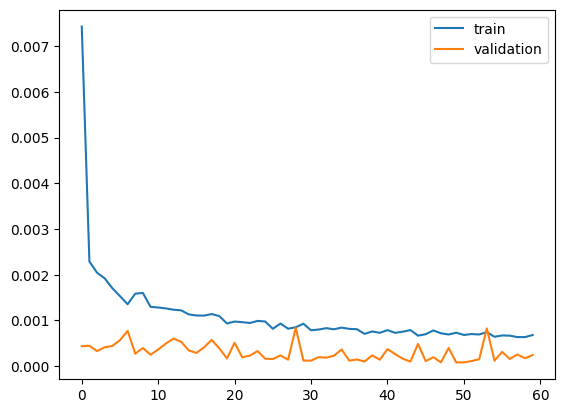

In [22]:
# 6. Create Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout

# 3 layers of LSTM with 50 units
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# add early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])

# plot the training loss and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [ ]:
#Phiên bản 1.3
# Import các thư viện cần thiết
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Khởi tạo mô hình Bidirectional LSTM
model = Sequential()
model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=128)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Biên dịch mô hình
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Thiết lập Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])

# Vẽ đồ thị training loss và validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

# Đánh giá mô hình trên tập dữ liệu kiểm tra
y_pred = model.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Squared Error on Testing Data: {mse}")
print(f"Root Mean Squared Error on Testing Data: {rmse}")
print(f"Mean Absolute Percentage Error on Testing Data: {mape}%")


# 7. Prediction on Train Set

120/120 [==============================] - 1s 6ms/step
Mean Squared Error on Training Data: 1220264.435170566
Root Mean Squared Error on Training Data: 1104.65579941019
Mean Absolute Percentage Error on Training Data: 6.499076328274913


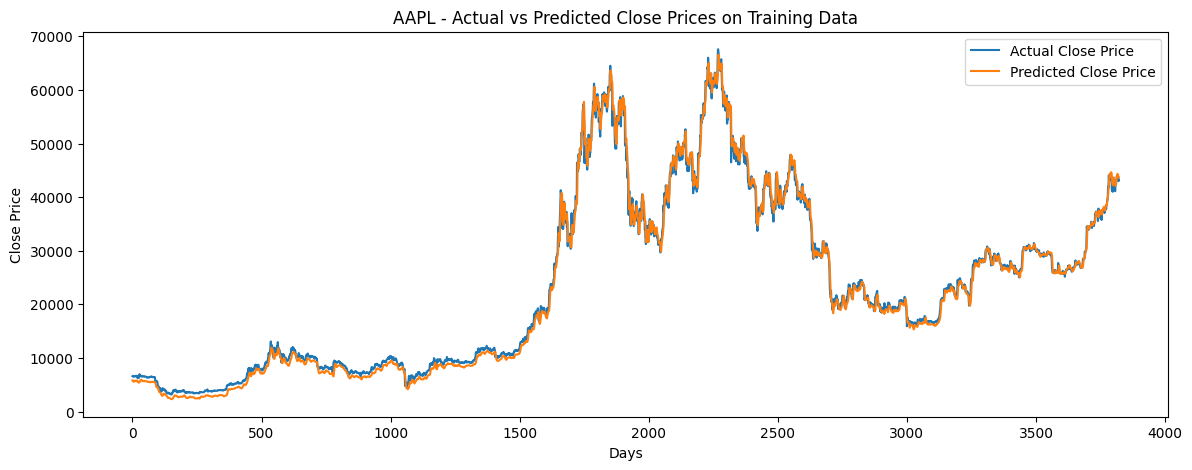

In [23]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Fit a separate scaler for the 'Close' prices
close_scaler = MinMaxScaler()
close_scaler.fit(df[['Close']])  # Fit the scaler on the original 'Close' prices

# Predict on training data
y_pred = model.predict(X_train)

# Inverse the normalization for predicted and actual values
y_pred_inv = close_scaler.inverse_transform(y_pred)
y_train_inv = close_scaler.inverse_transform(y_train.reshape(-1, 1))

# calculate mean squared error on training data
mse_train = mean_squared_error(y_train_inv, y_pred_inv)
print('Mean Squared Error on Training Data:', mse_train)

# calculate root mean squared error on training data
rmse_train = np.sqrt(mse_train)
print('Root Mean Squared Error on Training Data:', rmse_train)

# calculate mape on training data
mape_train = np.mean(np.abs((y_train_inv - y_pred_inv) / y_train_inv)) * 100
print('Mean Absolute Percentage Error on Training Data:', mape_train)

# Plot the actual and predicted values
plt.figure(figsize=(14, 5))
plt.plot(y_train_inv, label='Actual Close Price')
plt.plot(y_pred_inv, label='Predicted Close Price')
plt.title('AAPL - Actual vs Predicted Close Prices on Training Data')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# 8. Prediction on Test Set

14/14 [==============================] - 0s 5ms/step


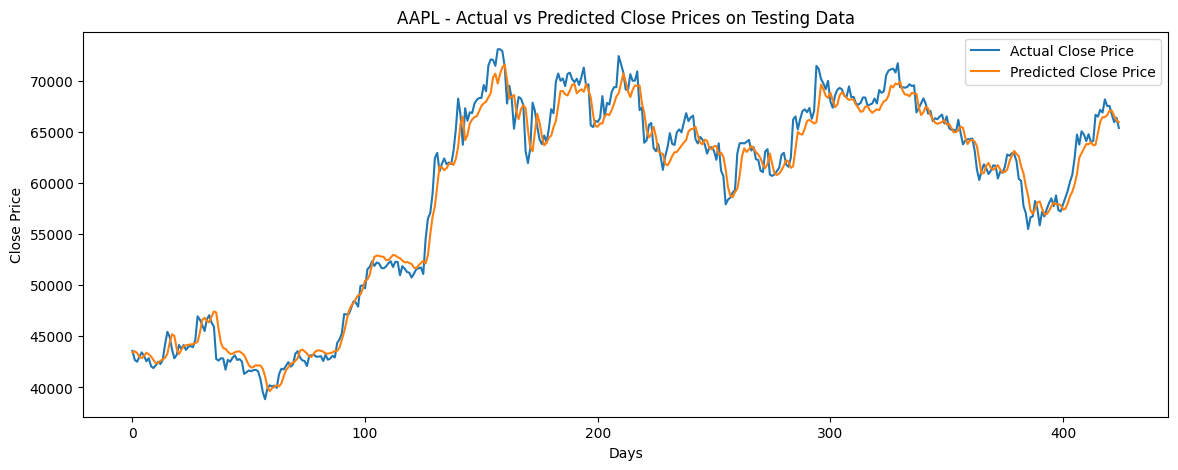

Mean Squared Error on Testing Data: 2118299.358618955
Root Mean Squared Error on Testing Data: 1455.4378580409934
Mean Absolute Percentage Error on Testing Data: 1.8406903053964678%


In [24]:
from sklearn.metrics import mean_squared_error

# Select the last 250 rows from the test data
# = X_test[0:600]
#y_test_last_250 = y_test[0:600]
X_test_last_250 = X_test
y_test_last_250 = y_test

# Predict on the last 250 rows of testing data
y_pred_test = model.predict(X_test_last_250)

# Inverse the normalization for predicted and actual values
y_pred_test_inv = close_scaler.inverse_transform(y_pred_test)
y_test_last_250_inv = close_scaler.inverse_transform(y_test_last_250.reshape(-1, 1))

# Plot the actual and predicted values on testing data
plt.figure(figsize=(14, 5))
plt.plot(y_test_last_250_inv, label='Actual Close Price')
plt.plot(y_pred_test_inv, label='Predicted Close Price')
plt.title('AAPL - Actual vs Predicted Close Prices on Testing Data')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Calculate the Mean Squared Error on testing data
mse = mean_squared_error(y_test_last_250_inv, y_pred_test_inv)
print(f'Mean Squared Error on Testing Data: {mse}')

# Calculate the Root Mean Squared Error (RMSE) on testing data
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error on Testing Data: {rmse}')

# Calculate the Mean Absolute Percentage Error (MAPE) on testing data
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_last_250_inv, y_pred_test_inv)
print(f'Mean Absolute Percentage Error on Testing Data: {mape}%')